In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import matplotlib as mpl
import numpy as np

In [2]:
df = pd.read_pickle('../results/results.pkl')

In [3]:
def get_rows(
    args_dict,
):
    idx = {}
    for key, value in args_dict.items():
        if value is None:
            idx[key] = np.ones_like(df[key], dtype=bool)
        else:
            idx[key] = df[key] == value
        
    run_idx = np.ones_like(df['test_loss'], dtype=bool)
    for key, value in idx.items():
        run_idx = run_idx & value
    
    # print(f"Selected {run_idx.sum()} runs!")
    
    run_df = df[run_idx].reset_index(drop=True)   
    return run_df

In [6]:
def get_loss(
    args_dict,
):
    run_df = get_rows(args_dict)

    test_loss = {}
    rank_set = np.unique(run_df['rank'])
    seed_set = np.unique(run_df['seed'])
    
    for method in ['sgd', 'ours']:
        group_df = run_df[run_df['method'] == method].reset_index(drop=True)        
        test_loss[method] = {}
        for rank in rank_set:
            rank_df = group_df[group_df['rank'] == rank].reset_index(drop=True)
            test_loss[method][rank] = {}
            for seed in seed_set:
                seed_df = rank_df[rank_df['seed'] == seed].reset_index(drop=True)        
                if method == 'sgd':
                    min_loss_index = seed_df['val_loss'].idxmin()
                    row_with_min_loss = seed_df.loc[min_loss_index]
                    test_loss[method][rank][seed] = row_with_min_loss['test_loss']
                elif method == 'ours':
                    test_loss[method][rank][seed] = seed_df['test_loss'].iloc[0]
                else:
                    raise notImplementError(f"We only support sgd and ours, not {method}!")
                    
    return {
        'test_loss': pd.DataFrame(test_loss), 
    }

In [7]:
# loading the data

random_linear = get_loss({
    'activation': 'linear',
    'use_bias': 0,
    'target_depth': 1,
    'frozen_depth': 2,
    'init_mode': 'default',
    'width': 16,
    'exp': 'fnn',
    'pretrained': 0,
    'tune_bias': 1,
})['test_loss']

random_fnn = get_loss({
    'activation': 'relu',
    'use_bias': 1,
    'target_depth': 2,
    'frozen_depth': 4,
    'init_mode': 'default',
    'width': 16,
    'exp': 'fnn',
    'pretrained': 0,
    'tune_bias': 1,
})['test_loss']

pretrained_linear = get_loss({
    'activation': 'linear',
    'use_bias': 0,
    'target_depth': 1,
    'frozen_depth': 2,
    'init_mode': 'default',
    'width': 16,
    'exp': 'fnn',
    'pretrained': 1,
})['test_loss']

pretrained_fnn = get_loss({
    'activation': 'relu',
    'use_bias': 1,
    'target_depth': 2,
    'frozen_depth': 4,
    'init_mode': 'default',
    'width': 16,
    'exp': 'fnn',
    'pretrained': 1,
})['test_loss']

IndexError: single positional indexer is out-of-bounds

In [11]:
get_loss({
    'activation': 'relu',
    'use_bias': 1,
    'target_depth': 2,
    'frozen_depth': 4,
    'init_mode': 'default',
    'width': 16,
    'exp': 'fnn',
    'pretrained': 0,
    'tune_bias': 1,
})

IndexError: single positional indexer is out-of-bounds

/tmp/ipykernel_1553861/4245971351.py:16: MatplotlibDeprecationWarning: The join function was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax[0, 0].get_shared_y_axes().join(ax[0, 0], ax[0, 1])
/tmp/ipykernel_1553861/4245971351.py:18: MatplotlibDeprecationWarning: The join function was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax[1, 0].get_shared_y_axes().join(ax[1, 0], ax[1, 1])


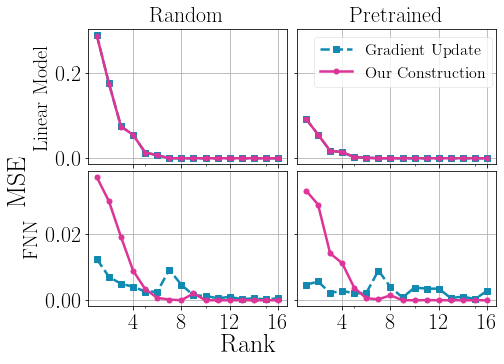

In [30]:
plt.rc('font', family='serif', serif='times new roman')
plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=22)
plt.rc('ytick', labelsize=22)
mpl.rcParams['patch.linewidth']=0.5 #width of the boundary of legend

rank_list = np.arange(16)+1
sgd_marker, sgd_color, sgd_lt, sgd_ms = 's', '#118AB2', '--', 6
our_marker, our_color, our_lt, our_ms = 'o', '#DD3497', '-', 5
lw = 2.5

fig, ax = plt.subplots(nrows=2, ncols=2, sharex = True)
fig.subplots_adjust(left=0.18, bottom=.15, right=0.99, top=0.92, wspace=0.05, hspace = 0.05) #margin of the figure
fig.set_size_inches(7, 5) #exact size of the figure
# First row share the same y-axis
ax[0, 0].get_shared_y_axes().join(ax[0, 0], ax[0, 1])
# Second row share the same y-axis
ax[1, 0].get_shared_y_axes().join(ax[1, 0], ax[1, 1])

random_linear['sgd'].plot(ax = ax[0][0], color = sgd_color, label = 'Gradient Update', linestyle = sgd_lt, marker = sgd_marker, linewidth = lw, markersize = sgd_ms)
random_linear['ours'].plot(ax = ax[0][0], color = our_color, label = 'Our Construction', linestyle = our_lt, marker = our_marker, linewidth = lw, markersize = our_ms)

pretrained_linear['sgd'].plot(ax = ax[0][1], color = sgd_color, label = 'Gradient Update', linestyle = sgd_lt, marker = sgd_marker, linewidth = lw, markersize = sgd_ms)
pretrained_linear['ours'].plot(ax = ax[0][1], color = our_color, label = 'Our Construction', linestyle = our_lt, marker = our_marker, linewidth = lw, markersize = our_ms)

random_fnn['sgd'].plot(ax = ax[1][0], color = sgd_color, label = 'Gradient Update', linestyle = sgd_lt, marker = sgd_marker, linewidth = lw, markersize = sgd_ms)
random_fnn['ours'].plot(ax = ax[1][0], color = our_color, label = 'Our Construction', linestyle = our_lt, marker = our_marker, linewidth = lw, markersize = our_ms)

pretrained_fnn['sgd'].plot(ax = ax[1][1], color = sgd_color, label = 'Gradient Update', linestyle = sgd_lt, marker = sgd_marker, linewidth = lw, markersize = sgd_ms)
pretrained_fnn['ours'].plot(ax = ax[1][1], color = our_color, label = 'Our Construction', linestyle = our_lt, marker = our_marker, linewidth = lw, markersize = our_ms)

# set the x-ticks

for i in range(2):
    for j in range(2):
        ax[i, j].set_xticks([4, 8, 12, 16])
        ax[i][j].grid(True)
        
ax[0][1].legend(fontsize=16, bbox_to_anchor=(1.02,1))
ax[0][0].set_title('Random', size = 22, y = 1.01)
ax[0][1].set_title('Pretrained', size = 22, y = 1.01)

fig.supxlabel('Rank', fontsize = 26)
fig.supylabel('MSE', fontsize = 26)

# Set y-labels for each row
ax[0, 0].set_ylabel('Linear Model', fontsize = 20)
ax[1, 0].set_ylabel('FNN', fontsize = 20)

plt.savefig('../figures/main_body.pdf')
# Show the plot
plt.show()


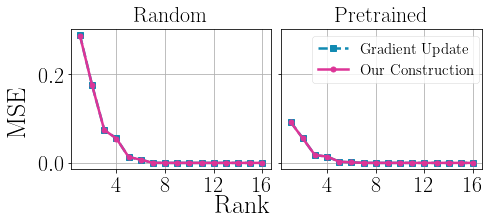

In [31]:
# Figure 1 setup
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=True, sharey = True)
fig.subplots_adjust(left=0.15, bottom=.23, right=0.99, top=0.88, wspace=0.05, hspace=0.05)
fig.set_size_inches(6.8, 3)

random_linear['sgd'].plot(ax=ax[0], color=sgd_color, label='Gradient Update', linestyle=sgd_lt, marker=sgd_marker, linewidth=lw, markersize=sgd_ms)
random_linear['ours'].plot(ax=ax[0], color=our_color, label='Our Construction', linestyle=our_lt, marker=our_marker, linewidth=lw, markersize=our_ms)

pretrained_linear['sgd'].plot(ax=ax[1], color=sgd_color, label='Gradient Update', linestyle=sgd_lt, marker=sgd_marker, linewidth=lw, markersize=sgd_ms)
pretrained_linear['ours'].plot(ax=ax[1], color=our_color, label='Our Construction', linestyle=our_lt, marker=our_marker, linewidth=lw, markersize=our_ms)

# set the x-ticks

for i in range(2):
    ax[i].set_xticks([4, 8, 12, 16])
    ax[i].grid(True)

ax[1].legend(fontsize=15, bbox_to_anchor=(1.02,1))
ax[0].set_title('Random', size = 22, y = 1.01)
ax[1].set_title('Pretrained', size = 22, y = 1.01)

fig.supxlabel('Rank', fontsize = 26)
fig.supylabel('MSE', fontsize = 26)


plt.savefig('../figures/figure1.pdf')
plt.show()

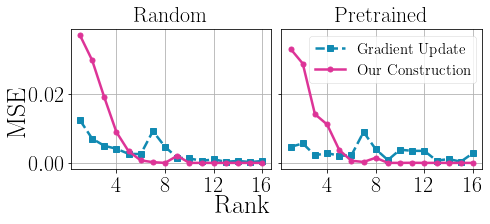

In [32]:
# Figure 2 setup
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=True, sharey = True)
fig.subplots_adjust(left=0.15, bottom=.23, right=0.99, top=0.88, wspace=0.05, hspace=0.05)
fig.set_size_inches(6.8, 3)

random_fnn['sgd'].plot(ax=ax[0], color=sgd_color, label='Gradient Update', linestyle=sgd_lt, marker=sgd_marker, linewidth=lw, markersize=sgd_ms)
random_fnn['ours'].plot(ax=ax[0], color=our_color, label='Our Construction', linestyle=our_lt, marker=our_marker, linewidth=lw, markersize=our_ms)

pretrained_fnn['sgd'].plot(ax=ax[1], color=sgd_color, label='Gradient Update', linestyle=sgd_lt, marker=sgd_marker, linewidth=lw, markersize=sgd_ms)
pretrained_fnn['ours'].plot(ax=ax[1], color=our_color, label='Our Construction', linestyle=our_lt, marker=our_marker, linewidth=lw, markersize=our_ms)

# set the x-ticks

for i in range(2):
    ax[i].set_xticks([4, 8, 12, 16])
    ax[i].grid(True)

ax[1].legend(fontsize=15, bbox_to_anchor=(0.1,1))
ax[0].set_title('Random', size = 22, y = 1.01)
ax[1].set_title('Pretrained', size = 22, y = 1.01)

fig.supxlabel('Rank', fontsize = 26)
fig.supylabel('MSE', fontsize = 26)


plt.savefig('../figures/figure2.pdf')
plt.show()

In [80]:
config = df[
    (df.activation == 'relu') &
    (df.method == 'sgd') &
    (df.use_bias == 1) &
    (df.target_depth == 2) &
    (df.frozen_depth == 4) &
    (df.init_mode == 'default') &
    (df.width == 16) &
    (df.exp == 'fnn') &
    (df.pretrained == 1) & 
    (df['rank'] == 6) &
    (df.pretrained == 1)
]

In [81]:
best_idx = config['val_loss'].idxmin()

In [82]:
config['train_loss'].loc[best_idx]

0.0020207008346915245

In [83]:
config['run_name'].loc[best_idx]

'vibrant-leaf-16793'

In [84]:
config['test_loss'].loc[best_idx]

0.0022019899915903807

In [17]:
import pandas as pd

# Sample DataFrame
df = pd.DataFrame({'col1': [1, 2, 3],
                   'col2': [4, 5, 6],
                   'col3': [7, 8, 9]})

# Sample Series
s = pd.Series([2, 5, 8], index=['col1', 'col2', 'col3'])

# Check if the Series is equal to any row in the DataFrame
is_equal = (df.eq(s).all(axis=1))

# Get index where Series is equal to a row in DataFrame
equal_row_index = is_equal[is_equal].index

print(f"Is Series equal to any row? {is_equal.any()}")
print(f"Index of equal row(s): {equal_row_index}")


Is Series equal to any row? True
Index of equal row(s): Int64Index([1], dtype='int64')


In [18]:
df

,col1,col2,col3
0,1,4,7
1,2,5,8
2,3,6,9
